# Capítulo 10 - Swiss-Prot e ExPASy

## 10.1 Analisando arquivos Swiss-Prot

Swiss-Prot (https://web.expasy.org/docs/swiss-prot_guideline.html) é um banco de dados com curadoria feita à mão de sequências proteicas. Biopython podem analisar o 'texto' do formato de arquivo Swiss-Prot, que continua sendo usado para o UniProt Knowledgebase cujo combina Swiss-Prot, TrEMBL e PIR-PSD.

Apesar de mantermos o foco na leitura das informações seja possível para um humano, `Bio.SeqIO` pode ler tanto a forma humana como o UniProt XML para anotações de sequências proteicas.

### 10.1.1 Analisando registros Swiss-Prot

Na **Seção 5.3.2** do Capítulo 5 (https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output), descrevemos com extrair informações de sequências de um registro Swiss-Prot como um objeto **SeqRecord**. Alternativamente, você pode armazenar o registro Swiss-Prot em um objeto `Bio.SwissProt.Record`, que guarda a informação completa contida no registro Swiss-Prot. Nessa seção, descreveremos como extrair os objetos `Bio.SwissProt.Record` de arquivos Swiss-Prot.

Para analisar um registro Swiss-Prot, vamos identificar esse registro. Temos algumas maneiras de dazer isso, dependendo de onde e como esse registro está armazenado:

- Abrir um arquivo Swiss-Prot localmente:

In [ ]:
identificador = open('meu_arquivo_swissprot.dat')

- Abrir um Swiss-Prot arquivo gzipado:

In [ ]:
import gzip
identificador = gzip.open('meu_arquivo_swissprot.dat.gz', 'rt')

- Abrir um arquivo Swiss-Prot a partir da internet (fazer isso antes de chamar a função **read**):

In [ ]:
from urllib.request import urlopen
url = 'https://raw.githubusercontent.com/biopython/biopython/master/Tests/SwissProt/F2CXE6.txt'
identificador - urlopen(identificador)

- Abrir um arquivo Swiss-Prot pela internet do banco de dados ExPASy (veja a **Seção 10.5.1** para mais informações):

In [ ]:
from Bio import ExPASy
meus_numeros_acesso = ['O23729', 'O23730', 'O23731']
identificador = ExPASy.get_sprot_raw(meus_numeros_acesso)

O ponto chave é que para o analisador, pouco importa como o identificador foi criado, contando que aponte para dados no formato Swiss-Prot. O analisador automaticamente decodificará os dados como ASCII (a codificação usada pelo Swiss-Prot) se o identificador for aberto em modo binário.

Podemos usar `Bio.SeqIO` como descrito na **Seção 5.3.2** para obter objetos **SeqRecord** de formatos de arquivos agnósticos. Alternativamente, podemos usar `Bio.SwissProt` para obter os objetos `Bio.SwissProt.Record`, que são mais próximos para o formato de arquivo subjacente.

Para ler um registro Swiss-Prot de um identificador, use a função **read()**:

In [ ]:
from Bio import SwissProt
registro = SwissProt.read(identificador)

Essa função deve ser usada se o identificador possuir somente **UM** registro Swiss-Prot. Será retornado o erro **ValueError** se nenhum registro for encontrado, e também se mais de um registro for encontrado.

Agora podemos mostrar alguma informação sobre o registro:

In [ ]:
print(registro.description)

In [ ]:
for ref in registro.references:
    print(f'Autores: {ref.autores}')
    print(f'Título: {ref.title}')
    print(registro.organism_classification)
    print('\n')

Para analisar um arquivo que contém mais de um registro, usamos a função **parse**. Essa função nos permite iterar sobre os registros do arquivo.

Por exemplo, para analisar o banco de dados completo de Swiss-Prot e coletar todas as suas descrições, você pode baixar em um arquivo gzipado (cerca de 600 MB) onde contém um único arquivo de mais ou menos 3 GB de tamanho (http://ftp.expasy.org/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.dat.gz).

Como mostrado no começo do capítulo, você pode usar a biblioteca `gzip` para abrir e descompactar o arquivo:

In [ ]:
import gzip
identificador = gzip.open('uniprot_sprot.dat.gz', 'rt')

Todavia, descompactar um arquivo grande leva muito tempo e cada vez que você precisar acessar o arquivo terá de descompavtá-lo. Portanto, se tiver espaço no disco e quiser otimizar suas tarefas, descompacte o arquivo gzipado uma única vez e use o arquivo bruto. Para acessá-lo, basta lê-lo como sempre:

In [ ]:
identificador = open('uniprot_sprot.dat')

Até Junho de 2009, o banco de dados completo de Swiss-Prot baixado do ExPASy contém 468851 registros. Uma forma concisa de criar uma lista com as descrições dos registros é com uma *list comprehension*:

In [ ]:
from Bio import SwissProt
identificador = open('uniprot_sprot.dat')
descricoes = [registro.description for registro in SwissProt.parse(identificador)]
len(descricoes)

In [ ]:
descricoes[:5]

Ou pode ser usado um loop para iterar os registros:

In [ ]:
from Bio import SwissProt
descricoes = []
identificador = open('uniprot_sprot.dat')
for registro in SwissProt.parse(identificador):
    descricoes.append(registro.description)
len(descricoes)

Devido ao tamanho do arquivo ser muito grande, qualquer uma das duas maneiras leva mais de 10 minutos para ficar pronto, por esse motivo os códigos estão aqui somente como exemplo.

### 10.1.2 Analisando as palavras-chaves Swiss-Prot e a lista de categorias

Swiss-Prot também distribui um arquivo chamado **keywords.txt** que contém uma lista de palavras-chaves e categorias usadas em Swiss-Prot. O arquivo possui as entradas na seguinte forma:

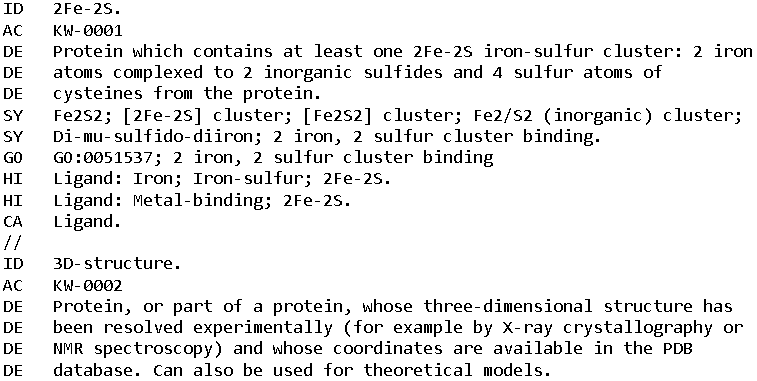 **...**

Onde cada sigla tem um significado:

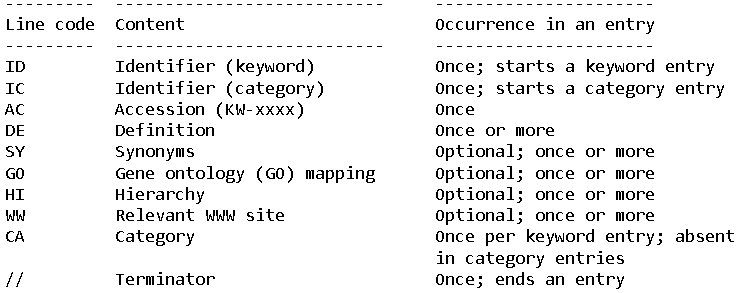

As entradas nesse arquivo podem ser analisadas pela função **parse** do módulo `Bio.SwissProt.KeyWList`. Cada entrada está armazenada como um `Bio.SwissProt.KeyWList.Record`, que é um dicionário Python. O arquivo usado como exemplo está no mesmo repositório que este arquivo:

In [1]:
from Bio.SwissProt import KeyWList
identificador = open('keywlist.txt')
registros = KeyWList.parse(identificador)
for registro in registros:
    print(registro['ID'])
    print(registro['DE'])
    print('\n')

2Fe-2S.
Protein which contains at least one 2Fe-2S iron-sulfur cluster: 2 iron atoms complexed to 2 inorganic sulfides and 4 sulfur atoms of cysteines from the protein.


3D-structure.
Protein, or part of a protein, whose three-dimensional structure has been resolved experimentally (for example by X-ray crystallography or NMR spectroscopy) and whose coordinates are available in the PDB database. Can also be used for theoretical models.


3Fe-4S.
Protein which contains at least one 3Fe-4S iron-sulfur cluster: 3 iron atoms complexed to 4 inorganic sulfides and 3 sulfur atoms of cysteines from the protein. In a number of iron-sulfur proteins, the 4Fe-4S cluster can be reversibly converted by oxidation and loss of one iron ion to a 3Fe-4S cluster.




## 10.2 Analisando registros Prosite

Prosite é um banco de dados que contém domínios proteicos, famílias de proteínas, sítos funcionais bem como os padrões e perfis para reconhecê-los. Prosite foi desenvolvido em paralelo com o Swiss-Prot. No Biopython, um registro Prosite é representado pela classe `Bio.ExPASy.Prosite.Record`, cujos membros correspondem aos diferentes campos em um registro Prosite.

De modo geral, um arquivo Prosite pode conter mais de um registro Prosite. Por exemplo, todos os registros do Prosite contêm XXXXX registros, que podem ser baixados em um único arquivo pelo site: https://ftp.expasy.org/databases/prosite/prosite.dat.

Agora podemos pegar os registros um por um e mostrar algumas de suas informações. Por exemplo, usando o arquivo contendo o banco de dados Prosite completo, encontramos:

In [ ]:
from Bio.ExPASy import Prosite
identificador = open('prosite.dat')
registros = Prosite.parse(identificador)
registro = next(registros)

In [ ]:
registro.accession

In [ ]:
registro.name

In [ ]:
registro.pdoc

In [ ]:
registro = next(registros)

In [ ]:
registro.accession

In [ ]:
registro.name

In [ ]:
registro.pdoc

In [ ]:
registro = next(registros)

In [ ]:
registro.accession

In [ ]:
registro.name

In [ ]:
registro.pdoc

E assim por diante. Se você estiver interessado em quantos registros há no documento, você pode fazer o seguinte:

In [ ]:
from Bio.ExPASy import Prosite
identificador = open('prosite.dat')
registros = Prosite.parse(identificador)
n = 0
for registro in registros:
    n += 1

Também há a função **read** que funciona para somente um registro no arquivo, se não existir um registro ou ter mais de um; é retornado o erro **ValueError**.

## 10.3 Analisando os registros da documentação Prosite

**pag 184**